In [3]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


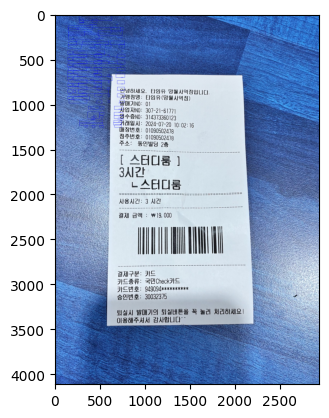

In [1]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext('bill1.png')

img = cv2.imread('bill2.jpeg')

img = Image.fromarray(img)
draw = ImageDraw.Draw(img)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]),  fill="blue")

plt.imshow(img)
plt.show()

https://davelogs.tistory.com/94

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_34888/4092319827.py:40: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


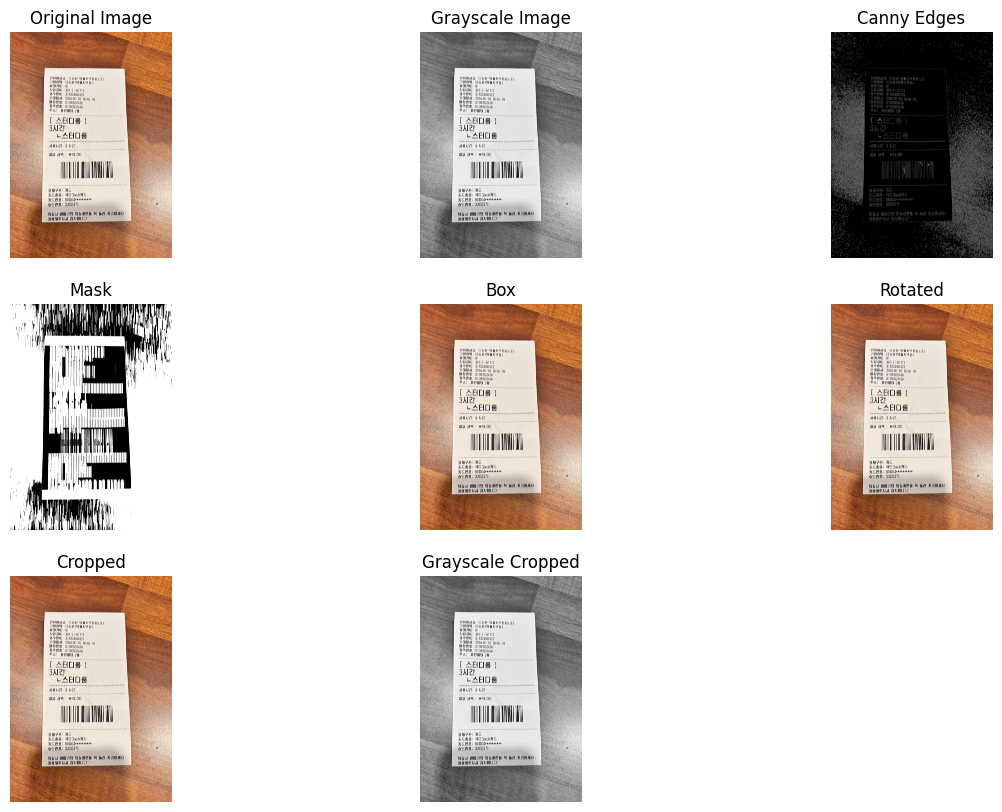

In [1]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# 이미지 파일 경로 설정
image_path = 'bill2.jpeg'  # 이미지 파일 이름

# 이미지를 읽어들이기
src = cv2.imread(image_path, 1)

# grayscale
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# canny
canned = cv2.Canny(gray, 150, 300)

# dilate to close holes in lines
kernel = np.ones((10, 1), np.uint8)  # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations=20)

# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

# 외곽 box 그리기
src_box = src.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3)

# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

# 흑백처리
gray2 = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

# 이미지 출력
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(gray2, cmap='gray')
plt.title('Grayscale Cropped')
plt.axis('off')

plt.show()


In [3]:
src = cv2.imread('bill2.jpeg', 1)

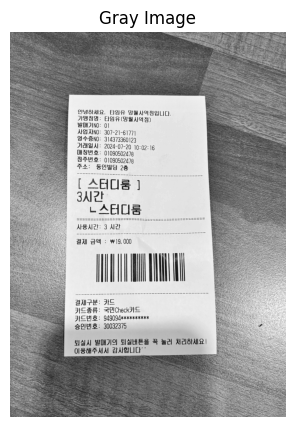

In [4]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

# 이미지 출력
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.show()

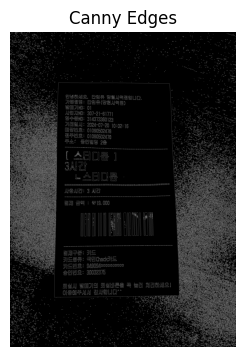

In [5]:
canned = cv2.Canny(gray, 150, 300)

plt.subplot(1, 2, 2)
plt.imshow(canned, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

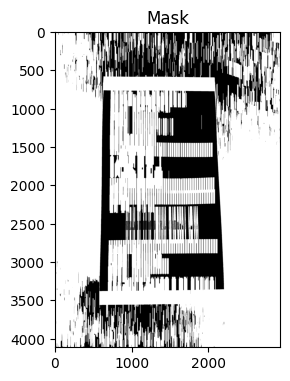

In [6]:
kernel = np.ones((10,1),np.uint8) # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations = 20)

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')

plt.show()

/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_81622/1160436821.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


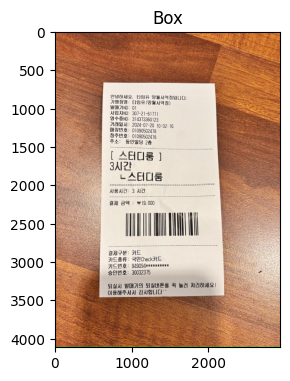

In [7]:
# contours 찾기
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src_box, cv2.COLOR_BGR2RGB))
plt.title('Box')

plt.show()

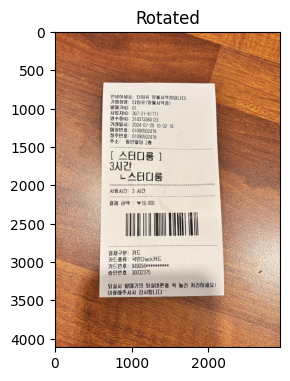

In [8]:
# angle 계산
angle = rect[-1]
if angle > 45:
    angle = -(90 - angle)

# 기울기 조정
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title('Rotated')

plt.show()

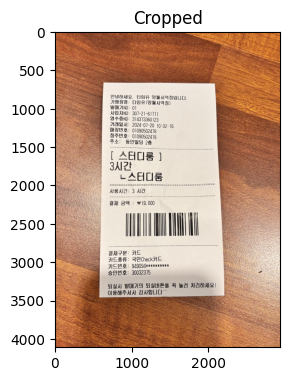

In [9]:
# 회전된 박스 좌표 찾기
ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.title('Cropped')

plt.show()

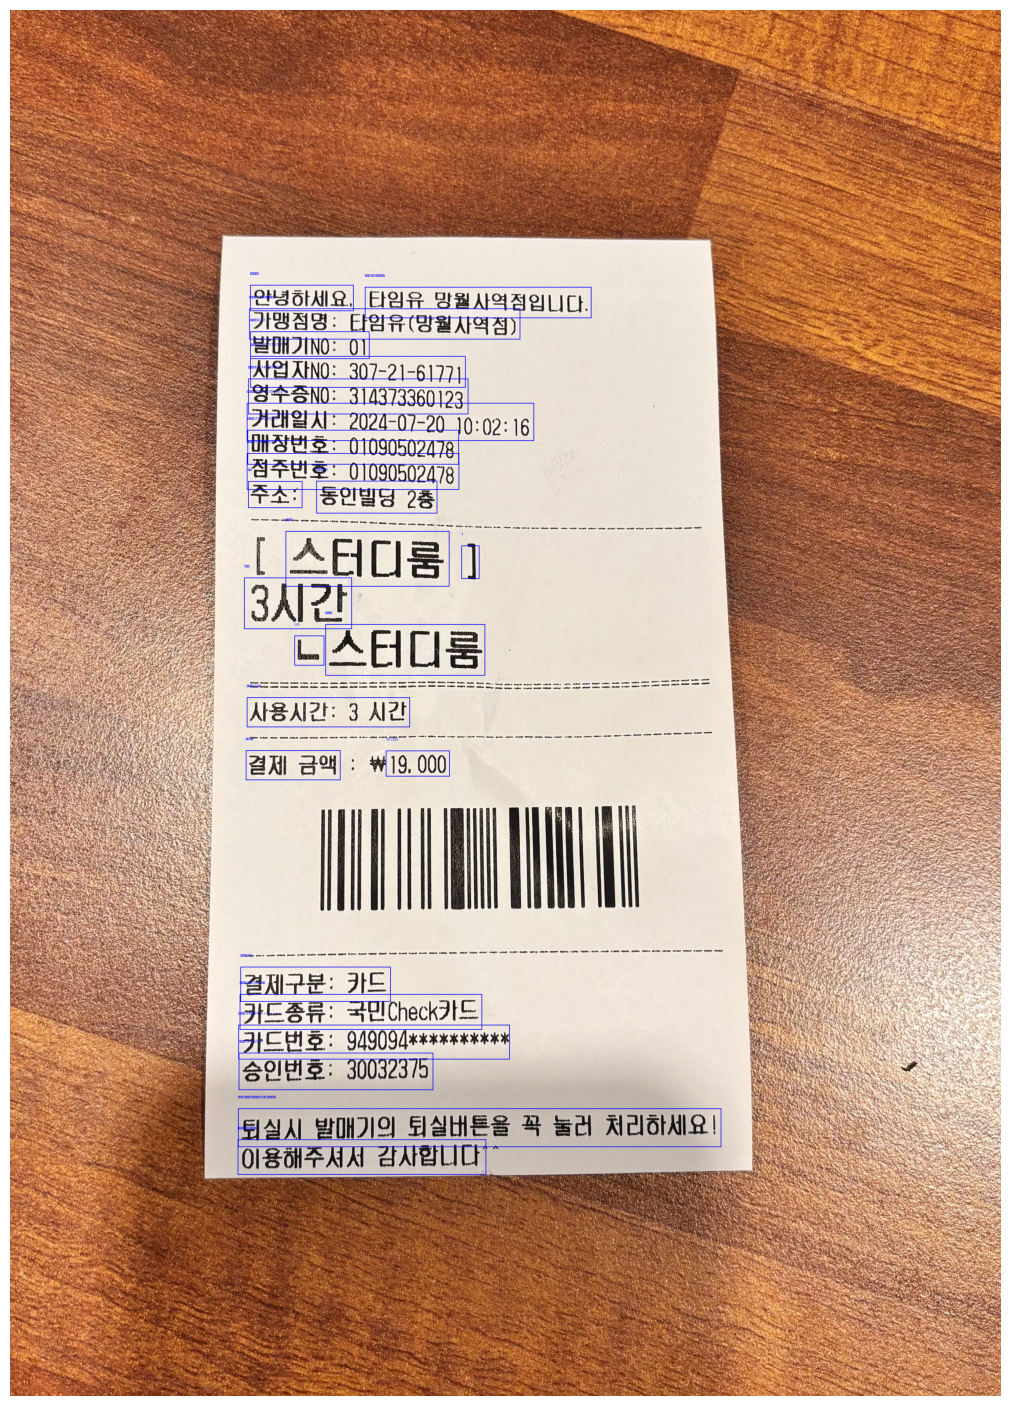

In [10]:
 # 전처리된 이미지를 EasyOCR로 처리하여 텍스트 인식
result = reader.readtext(crop)
reader = easyocr.Reader(['ko'])  # 한글 폰트 사용

# 파란색 상자를 그리기 위한 PIL 이미지로 변환
img = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
draw = ImageDraw.Draw(img)

# 각 텍스트 주위에 상자를 그리고 텍스트를 쓰기
for detection in result:
    bbox = detection[0]
    text = detection[1]
    # 상자 좌표
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[2]
    # 파란색 상자 그리기
    draw.rectangle([x_min, y_min, x_max, y_max], outline="blue", width=2)
    # 텍스트 쓰기
    draw.text((x_min, y_min - 40), text, fill="blue")

# 이미지 출력
plt.figure(figsize=(25, 18))  # 이미지를 크게 표시하기 위해 figure 크기를 조정합니다

plt.imshow(img)
plt.axis('off')
plt.show()


# ^ 여기까지 이미지 전처리

# 한글 + 영어 + 숫자

Using CPU. Note: This module is much faster with a GPU.


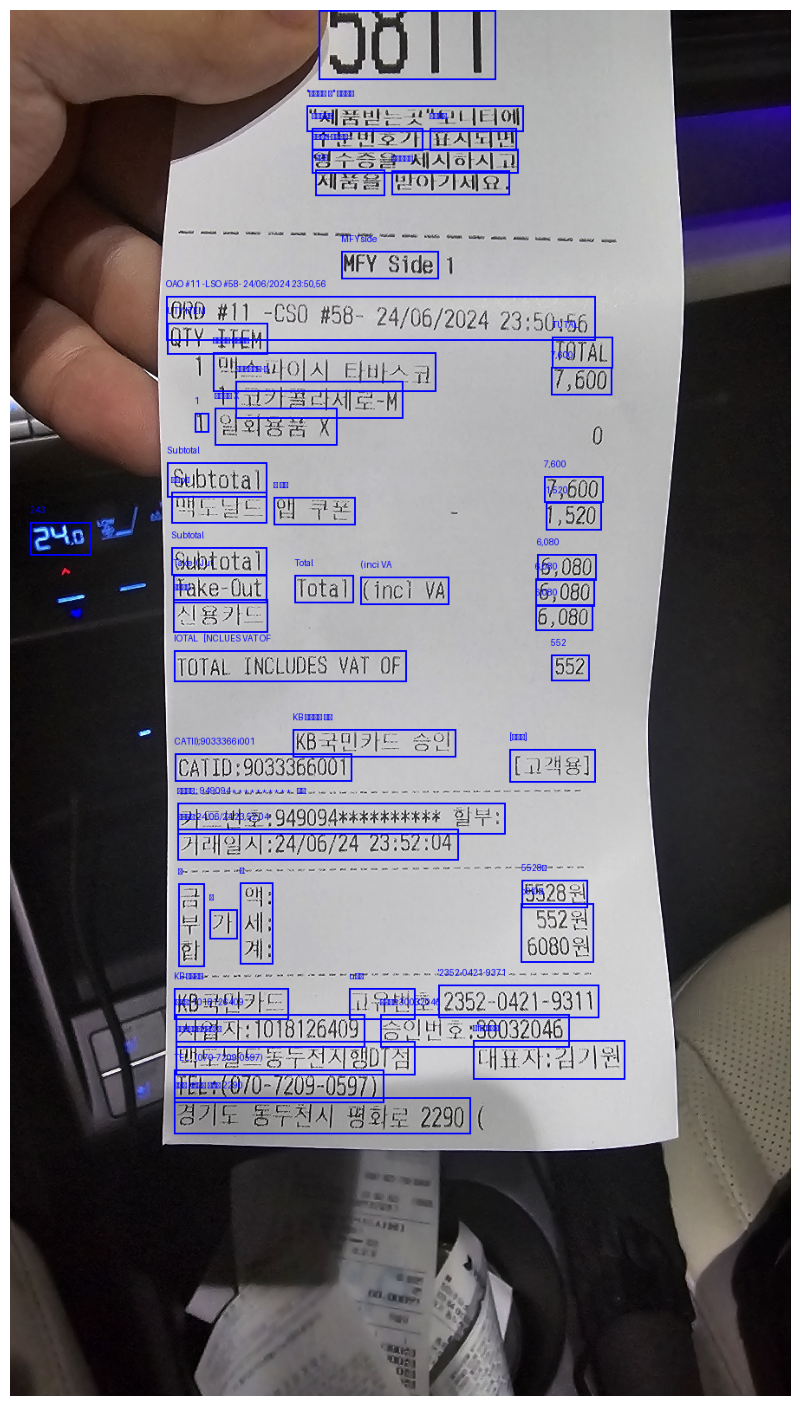

Extracted text has been saved to extracted_text.json


In [16]:
import cv2
import easyocr
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd
import json

# EasyOCR reader 객체 생성 (한글 및 영어 지원)
reader = easyocr.Reader(['ko', 'en'], gpu=False)

def extract_text_from_image(image):
    """
    이미지를 처리하여 텍스트를 추출하고 박스를 그립니다.
    """
    # 이미지에서 텍스트 추출
    results = reader.readtext(image)
    
    # 파란색 상자를 그리기 위한 PIL 이미지로 변환
    img = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img)

    # 추출된 텍스트를 저장할 리스트
    extracted_text = []
    
    # 각 텍스트 주위에 상자를 그리고 텍스트를 저장
    for detection in results:
        bbox = detection[0]
        text = detection[1]
        confidence = detection[2]
        
        # 필터링 조건 (필요에 따라 수정 가능)
        extracted_text.append(text)
        
        # 상자 좌표
        x_min, y_min = int(bbox[0][0]), int(bbox[0][1])
        x_max, y_max = int(bbox[2][0]), int(bbox[2][1])
        
        # 상자와 텍스트 색상 설정
        box_color = "blue"
        text_color = "blue"
        
        # 상자 그리기
        draw.rectangle([x_min, y_min, x_max, y_max], outline=box_color, width=2)
        # 텍스트 쓰기
        draw.text((x_min, y_min - 20), text, fill=text_color)
    
    # 이미지 출력
    plt.figure(figsize=(25, 18))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return extracted_text

def save_text_to_json(text_list, file_path):
    """
    텍스트 리스트를 JSON 파일로 저장합니다.
    공백을 제거하고, 빈 문자열을 제외합니다.
    """
    # 공백 제거 및 빈 문자열 필터링
    cleaned_text_list = [text.strip().replace('\n', ' ').replace('\r', '') for text in text_list if text.strip()]

    # JSON 파일로 저장
    with open(file_path, 'w', encoding='utf-8') as json_file:
        json.dump({"Extracted Text": cleaned_text_list}, json_file, ensure_ascii=False, indent=4)
    
    print(f"Extracted text has been saved to {file_path}")

# 이미지 파일 경로
image_path = 'bill4.jpeg'

# 이미지 읽기
image = cv2.imread(image_path)
if image is None:
    raise Exception(f"Could not read the image from {image_path}")

# 텍스트 추출 및 박스 그리기
extracted_text = extract_text_from_image(image)

# JSON 파일로 저장
json_file_path = 'extracted_text.json'
save_text_to_json(extracted_text, json_file_path)


## 사업자 번호 추출
- 사업자등록번호
- 품목이름
- 지출 금액
- 지출 총 금액
- 상호명
- 날짜

In [10]:
import pandas as pd
import re

def load_text_from_csv(file_path):
    """
    CSV 파일에서 텍스트를 로드
    """
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    return df['Extracted Text'].tolist()

def extract_business_numbers(text_list):
    """
    텍스트 리스트에서 사업자 번호 추출
    """
    business_number_pattern = re.compile(r'\b\d{3}-\d{2}-\d{5}\b')
    business_numbers = []

    for text in text_list:
        matches = business_number_pattern.findall(text)
        business_numbers.extend(matches)

    return business_numbers

def extract_prices(text_list):
    """
    텍스트 리스트에서 결제 금액과 같은 행에 있는 가격 추출
    """
    price_pattern = re.compile(r'결제금액.*?([₩$€]?\s?\d{1,3}(?:,\d{3})*(?:\.\d{2})?)')
    prices = []

    for text in text_list:
        matches = price_pattern.findall(text)
        prices.extend(matches)

    return prices

def extract_store_names(text_list):
    """
    텍스트 리스트에서 상호명 추출
    """
    # 상호명, 업체명, 회사명 등 다양한 표현을 포괄하는 정규 표현식
    store_name_pattern = re.compile(r'(상호명|회사명|업체명|가맹점명|가맣점명)\s*[:：]?\s*(\S+)')
    store_names = []

    for text in text_list:
        matches = store_name_pattern.findall(text)
        if matches:
            for match in matches:
                store_names.append(match[1])

    return store_names


def extract_transaction_date(text_list):
    """
    텍스트 리스트에서 결제일시, 거래일, 결제날짜와 같은 단어 옆에 있는 날짜와 시간을 추출
    """
    # 결제일시, 거래일 등의 키워드와 함께 날짜를 추출하는 정규 표현식
    date_pattern = re.compile(r'(거래일시|결제일시|거래일|결제날짜|날짜)\s*[:：]?\s*(\d{4}[-/]\d{2}[-/]\d{2})\s+(\d{2}):\s?(\d{2}):\s?(\d{2})')
    dates = []

    for text in text_list:
        matches = date_pattern.findall(text)
        for match in matches:
            # 날짜와 시간 부분을 결합하여 추출 (예: "2024-07-20 10:02:16")
            full_date = f"{match[1]} {match[2]}:{match[3]}:{match[4]}"
            dates.append(full_date)

    return dates


def extract_item_prices(text_list):
    """
    텍스트 리스트에서 품목별 가격 추출
    """
    item_price_pattern = re.compile(r'(품목|아이템|상품)\s*[:：]?\s*(.*?)\s*가격\s*[:：]?\s*([₩$€]?\s?\d{1,3}(?:,\d{3})*(?:\.\d{2})?)')
    item_prices = []

    for text in text_list:
        matches = item_price_pattern.findall(text)
        for match in matches:
            item_prices.append((match[1], match[2]))  # (품목, 가격)

    return item_prices

def extract_total_price(text_list):
    """
    텍스트 리스트에서 총 가격을 추출합니다.
    """
    total_price_pattern = re.compile(r'총\s*가격\s*[:：]?\s*([₩$€]?\s?\d{1,3}(?:,\d{3})*(?:\.\d{2})?)')
    total_prices = []

    for text in text_list:
        matches = total_price_pattern.findall(text)
        total_prices.extend(matches)

    return total_prices

# CSV 파일 경로
csv_file_path = 'extracted_text.csv'

# CSV에서 텍스트 추출
extracted_text = load_text_from_csv(csv_file_path)

# 사업자 번호 추출
business_numbers = extract_business_numbers(extracted_text)
print("사업자 번호:", business_numbers)

# 가격 추출
prices = extract_prices(extracted_text)
print("가격:", prices)

# 상호명 추출
store_names = extract_store_names(extracted_text)
print("상호명:", store_names)

# 결제 일시 추출
transaction_dates = extract_transaction_date(extracted_text)
print("결제 일시:", transaction_dates)

# 품목별 가격 추출
item_prices = extract_item_prices(extracted_text)
print("품목별 가격:", item_prices)

# 총 가격 추출
total_prices = extract_total_price(extracted_text)
print("총 가격:", total_prices)


사업자 번호: ['307-21-61771']
가격: []
상호명: ['타임유']
결제 일시: ['2024-07-20 10:02:16']
품목별 가격: []
총 가격: []


### 사업자 번호로 웹 크롤링

In [11]:
############### 소분류 크롤링 ################
from selenium import webdriver
from selenium.webdriver.common.by import By

# Selenium driver 설정
driver = webdriver.Chrome()

# 리스트에 있는 모든 사업자 번호에 대해 반복 실행
for business_number in business_numbers:
    # 사업자 번호 형식에서 "-" 제거 (URL에 넣을 때는 숫자만 필요)
    business_number_clean = business_number.replace("-", "")
    
    # 동적으로 URL 생성
    adress = 'https://bizno.net/article/' + business_number_clean
    print(f"접속 중인 URL: {adress}")

    # URL로 이동
    driver.get(adress)

    # category_keywords 추출
    try:
       shop_name = driver.find_element(By.XPATH, '/html/body/section[1]/div/div/div/h1').text
       print(f"사업자 번호 {business_number}의 상호명: {shop_name}")
        
       category_keywords = driver.find_element(By.XPATH, '/html/body/section[2]/div/div/div[1]/div[1]/div/table/tbody/tr[4]/td/p[3]').text
       print(f"{category_keywords}")
    except:
        print(f"사업자 번호 {business_number}에 대한 정보를 찾을 수 없습니다.")

# 드라이버 종료
driver.quit()


접속 중인 URL: https://bizno.net/article/3072161771
사업자 번호 307-21-61771에 대한 정보를 찾을 수 없습니다.


In [86]:
########### 업태 크롤링 #############
from selenium import webdriver
from selenium.webdriver.common.by import By

# Selenium driver 설정
driver = webdriver.Chrome()

# 리스트에 있는 모든 사업자 번호에 대해 반복 실행
for business_number in business_numbers:
    # 사업자 번호 형식에서 "-" 제거 (URL에 넣을 때는 숫자만 필요)
    business_number_clean = business_number.replace("-", "")
    
    # 동적으로 URL 생성
    adress = 'https://bizno.net/article/' + business_number
    print(f"접속 중인 URL: {adress}")

    # URL로 이동
    driver.get(adress)

    # category_keywords 추출
    try:
       category_keywords = driver.find_element(By.XPATH, '/html/body/section[2]/div/div/div[1]/div[1]/div/table/tbody/tr[5]/td').text
       print(f"업태: {category_keywords}")
    except:
        print(f"사업자 번호 {business_number}에 대한 정보를 찾을 수 없습니다.")

driver.quit()

접속 중인 URL: https://bizno.net/article/5958800511
업태: 도매 및 소매업


### 저장해둔 데이터와 비교 및 개정과목 분류

In [ ]:
import pandas as pd

# 카테고리와 관련된 키워드를 정의
categories_keywords = {
    '여비교통비': ['육상 여객 운송업', '항공 여객 운송업', '택시 운송업', '주유소 운영업', '자동차 임대업'],
    '접대비': ['한식 음식점업', '중식 음식점업', '일식 음식점업', '서양식 음식점업', '기타 외국식 음식점업', '주점업', '기념품 및 장식용품 소매업'],
    '회의비': ['다방업', '비알콜 음료점업', '호텔업', '기타 음식점업'],
    '복리후생비': ['음식점업', '일반 병원', '치과 병원', '레저업', '운동시설 운영업', '화초 및 식물 소매업'],
    '통신비': ['유선 통신업', '무선 통신업', '우편업', '택배업'],
    '사무용품비': ['문구 소매업', '컴퓨터 및 주변기기 소매업', '사무용 기계 및 장비 임대업'],
    '교육훈련비': ['기타 교육기관', '서적 소매업', '온라인 교육 서비스업'],
    '소모품비': ['도매 및 소매업','문구 소매업', '컴퓨터 및 주변기기 소매업', '전기 용품 소매업'],
    '임차료': ['부동산 임대업', '자동차 임대업', '산업용 기계 및 장비 임대업'],
    '출장비': ['호텔업', '육상 여객 운송업', '항공 여객 운송업', '음식점업'],
    '수수료': ['신용카드업', '여신 금융업', '기타 금융지원 서비스업', '기타 개인 서비스업']
}

def load_data(file_path):
    """
    CSV 파일에서 데이터를 로드합니다.
    """
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    return df

def classify_text(text, categories_keywords):
    """
    텍스트를 카테고리와 키워드를 사용하여 분류합니다.
    """
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return category
    return '미분류'  # 카테고리에 해당하지 않는 경우

def classify_crawled_data(crawled_df, categories_keywords):
    """
    크롤링된 데이터를 카테고리로 분류합니다.
    """
    crawled_df['Category'] = crawled_df['Info'].apply(lambda text: classify_text(text, categories_keywords))
    return crawled_df

# 데이터 파일 경로
crawled_data_path = 'crawled_business_data.csv'

# 데이터 로드
crawled_data = load_data(crawled_data_path)

# 데이터 분류
classified_data = classify_crawled_data(crawled_data, categories_keywords)

# 결과 파일 경로
classified_data_path = 'classified_business_data.csv'

# 결과 저장
classified_data.to_csv(classified_data_path, index=False, encoding='utf-8-sig')
print(f"Classified data has been saved to '{classified_data_path}'")


# 예측

In [6]:
import numpy as np
import pandas as pd

# 시드 설정
np.random.seed(42)

# 데이터 생성
months = pd.date_range(start='2022-01-01', periods=24, freq='M')  # 24개월간의 데이터
account_categories = ['여비교통비','접대비','회의비','복리후생비','통신비','사무용품비','교육훈련비','소모품비','임차료','출장비','수수료']  # 계정과목 리스트

data = {
    'Month': np.repeat(months, len(account_categories)),
    'Account': account_categories * len(months),
    'Amount': np.random.randint(10000, 1000000, size=len(months) * len(account_categories))  # 1만원에서 100만원 사이의 랜덤 금액
}

df = pd.DataFrame(data)
df.head(10)  # 상위 10개 레코드 출력


/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_19102/3336504619.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2022-01-01', periods=24, freq='M')  # 24개월간의 데이터


Month Account  Amount
0 2022-01-31   여비교통비  131958
1 2022-01-31     접대비  681155
2 2022-01-31     회의비  141932
3 2022-01-31   복리후생비  375838
4 2022-01-31     통신비  269178
5 2022-01-31   사무용품비  654167
6 2022-01-31   교육훈련비  120268
7 2022-01-31    소모품비  742180
8 2022-01-31     임차료   64886
9 2022-01-31     출장비  147337

In [7]:
# 월별 계정과목별 총 금액 집계
df_pivot = df.pivot_table(index='Month', columns='Account', values='Amount', aggfunc='sum').fillna(0)
df_pivot.head()


Account      교육훈련비   복리후생비   사무용품비    소모품비     수수료   여비교통비     임차료     접대비  \
Month                                                                        
2022-01-31  120268  375838  654167  742180  531430  131958   64886  681155   
2022-02-28  288167  922756  201335   51090  797201  964698  339365   97498   
2022-03-31  113355  786997  801743  245796  357449  331879  224176  728315   
2022-04-30  166730  496232  510186  880910  664811  431909  394681  999436   
2022-05-31  963277   75725   94654  915778  338947  537035  601723  658143   

Account        출장비     통신비     회의비  
Month                               
2022-01-31  147337  269178  141932  
2022-02-28   74820  185203  909159  
2022-03-31  194779  209041  337069  
2022-04-30  159503  927040  268795  
2022-05-31  329030  139981  462366

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 예측 준비 (각 계정과목에 대해 개별적으로 예측)
predictions = {}
for account in account_categories:
    X = np.array(range(len(df_pivot))).reshape(-1, 1)  # 달 수를 Feature로 사용
    y = df_pivot[account].values
    
    # 훈련 및 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # 모델 훈련
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 다음 달 예측
    next_month = np.array([[len(df_pivot)]])  # 다음 달을 예측
    predictions[account] = model.predict(next_month)[0]

# 예측 결과 출력
print("다음 달 예측된 비용 (계정과목별):")
for account, amount in predictions.items():
    print(f"{account}: {amount:.2f} 원")


다음 달 예측된 비용 (계정과목별):
여비교통비: 656921.97 원
접대비: 127224.21 원
회의비: 837111.87 원
복리후생비: 459756.53 원
통신비: 482174.37 원
사무용품비: 552207.29 원
교육훈련비: 902875.79 원
소모품비: 345240.08 원
임차료: 569209.74 원
출장비: 586749.68 원
수수료: 492852.82 원


/Users/kimsomin/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
 

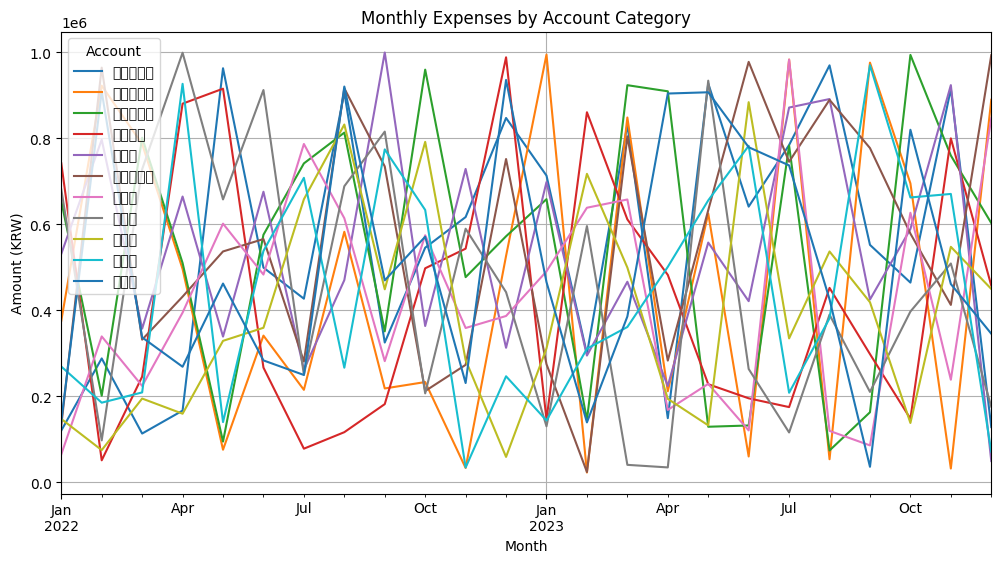

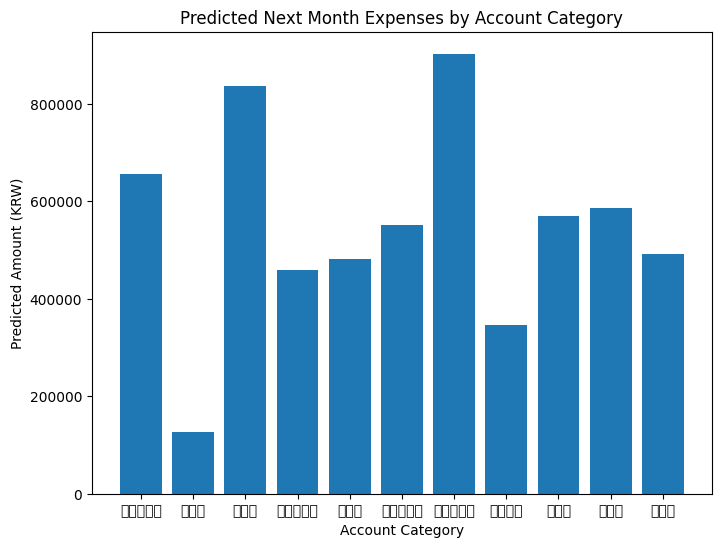

In [9]:
import matplotlib.pyplot as plt

# 기존 데이터 시각화
df_pivot.plot(figsize=(12, 6))
plt.title('Monthly Expenses by Account Category')
plt.xlabel('Month')
plt.ylabel('Amount (KRW)')
plt.legend(title='Account')
plt.grid(True)
plt.show()

# 예측 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(predictions.keys(), predictions.values())
plt.title('Predicted Next Month Expenses by Account Category')
plt.xlabel('Account Category')
plt.ylabel('Predicted Amount (KRW)')
plt.show()


# SARIMA(계절성)

In [83]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 폰트 확인
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'Nanum' in font:  # 원하는 폰트 이름으로 필터링
        print(font)


/Users/kimsomin/Library/Fonts/NanumGothic-Regular.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/bad9b4bf17cf1669dde54184ba4431c22dcad27b.asset/AssetData/NanumGothic.ttc
/Users/kimsomin/Library/Fonts/NanumGothic-Bold.ttf
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/70816a43827731d40efe234b94feba96db91024f.asset/AssetData/NanumMyeongjo.ttc
/System/Library/AssetsV2/com_apple_MobileAsset_Font7/6f4c91728bb824d6960725ec479c355eab7eeba8.asset/AssetData/NanumScript.ttc
/Users/kimsomin/Library/Fonts/NanumGothic-ExtraBold.ttf


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

폰트 이름: NanumGothic


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

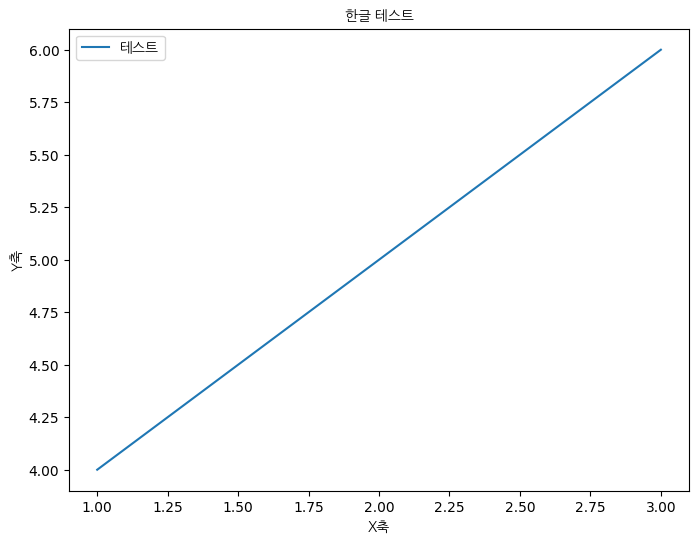

In [74]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/Users/kimsomin/Library/Fonts/NanumGothic-Regular.ttf'  # NanumGothic 폰트 경로

# 폰트 프로퍼티 생성
fontprop = fm.FontProperties(fname=font_path)

# 설정된 폰트 이름 출력 (올바르게 로드되었는지 확인)
print("폰트 이름:", fontprop.get_name())

# 전체 폰트 설정
plt.rc('font', family=fontprop.get_name())

# 그래프 그리기 테스트
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3], [4, 5, 6], label='테스트')
plt.title('한글 테스트', fontproperties=fontprop)
plt.xlabel('X축', fontproperties=fontprop)
plt.ylabel('Y축', fontproperties=fontprop)
plt.legend(prop=fontprop)
plt.show()


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 시드 설정 및 데이터 생성
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=36, freq='M')
account_categories = ['식비', '출장비', '소모품비', '홍보비']

data = {
    'Month': np.repeat(months, len(account_categories)),
    'Account': np.tile(account_categories, len(months)),
    'Amount': np.tile(np.sin(np.linspace(0, 3 * np.pi, len(months))) * 100000 + np.random.randint(50000, 150000, len(months)), len(account_categories))
}
df = pd.DataFrame(data)


/var/folders/pw/w8rt727n6j51gnhj0dxq0xlw0000gn/T/ipykernel_67035/236232766.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2022-01-01', periods=36, freq='M')


In [76]:
# SARIMA 모델 설정 및 예측 수행
model_predictions = {}

for account in account_categories:
    account_data = df[df['Account'] == account].set_index('Month')['Amount']
    
    sarima_model = sm.tsa.SARIMAX(account_data, 
                                  order=(1, 1, 1), 
                                  seasonal_order=(1, 1, 1, 12), 
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)
    sarima_result = sarima_model.fit(disp=False)
    
    forecast = sarima_result.get_forecast(steps=1)
    forecast_value = forecast.predicted_mean.values[0]
    model_predictions[account] = forecast_value

# 예측 결과 출력
print("계절성을 고려한 다음 달 예측된 비용 (계정과목별):")
for account, amount in model_predictions.items():
    print(f"{account}: {amount:.2f} 원")


/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/kimsomin/miniconda3/lib/pytho

계절성을 고려한 다음 달 예측된 비용 (계정과목별):
식비: 179820.20 원
출장비: 336046.24 원
소모품비: 464515.32 원
홍보비: 247898.62 원


/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/kimsomin/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

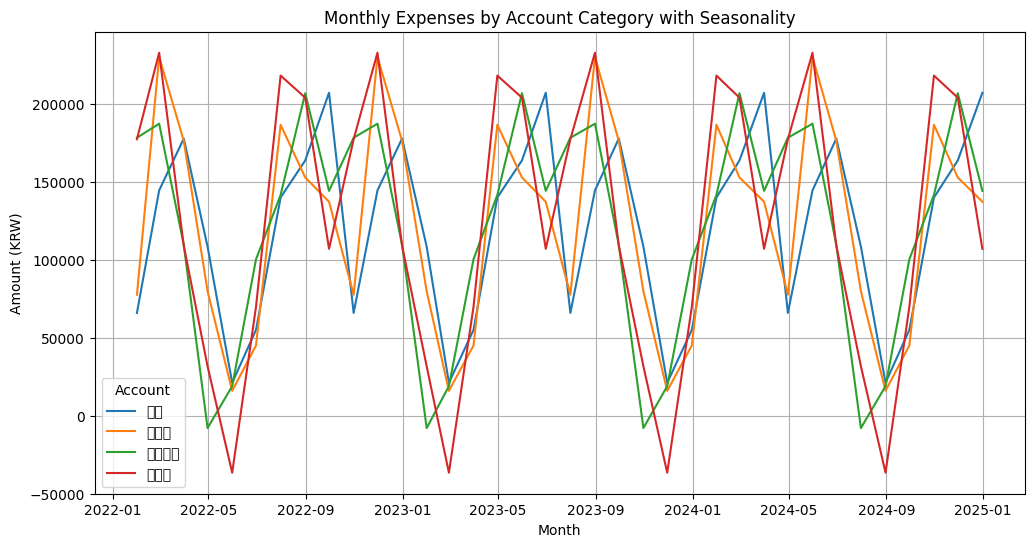

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

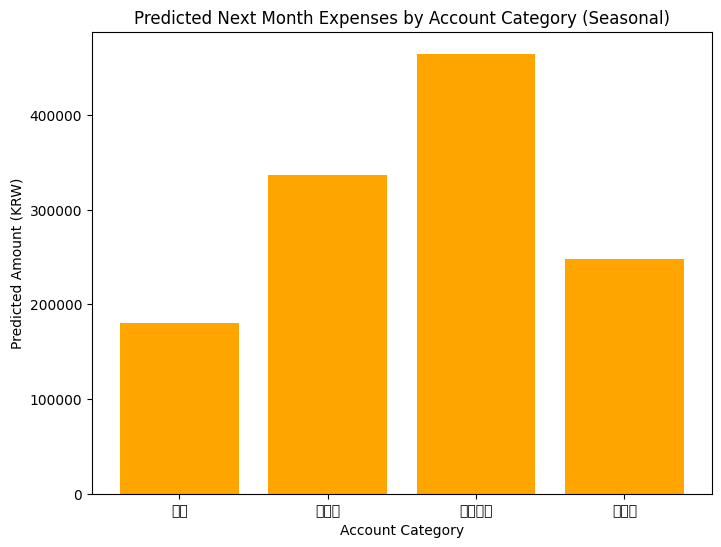

In [77]:
# 기존 데이터 시각화
plt.figure(figsize=(12, 6))
for account in account_categories:
    plt.plot(df[df['Account'] == account]['Month'], df[df['Account'] == account]['Amount'], label=account)

plt.title('Monthly Expenses by Account Category with Seasonality')
plt.xlabel('Month')
plt.ylabel('Amount (KRW)')
plt.legend(title='Account')
plt.grid(True)
plt.show()

# SARIMA 모델 예측 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(model_predictions.keys(), model_predictions.values(), color='orange')
plt.title('Predicted Next Month Expenses by Account Category (Seasonal)')
plt.xlabel('Account Category')
plt.ylabel('Predicted Amount (KRW)')
plt.show()
